In [1]:
import numpy as np
import pandas as pd
import os
import sys
import re # optional using function getAllStock
import StockClass as stkcls
from StockClass import StockData
from StockClass import WaveletFilter
%matplotlib inline

In [2]:
data_file = stkcls.runFullClass('stockCollectionUpdate - checkoutpage_1.csv', '0005.HK' )
#stkcls.importData('stockCollectionUpdate-checkoutpage_1.csv')
rr = data_file.movingFunc(window=[10, 50,100, 150], fields=["New","Open","Close"], func='mean')

/home/allen/myDoc/GitRepo/TimeSeries/TimeSeries/myDoc_initaldata/stockCollectionUpdate - checkoutpage_1.csv
['0005.HK']


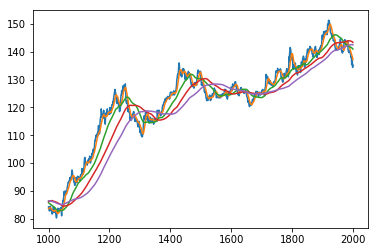

In [3]:
import matplotlib
import matplotlib.pyplot as plt
plot_range=range(1000,2000)
plt.plot(data_file.data['Open'][plot_range])
plt.plot(data_file.data['Open_mean_10'][plot_range])
plt.plot(data_file.data['Open_mean_50'][plot_range])
plt.plot(data_file.data['Open_mean_100'][plot_range])
plt.plot(data_file.data['Open_mean_150'][plot_range])
plt.show()


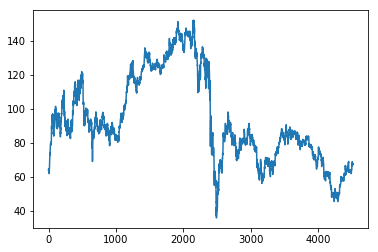

True

In [4]:
data_file.plotSingleSeries("Open")

In [5]:
waveletfilter = WaveletFilter(2)

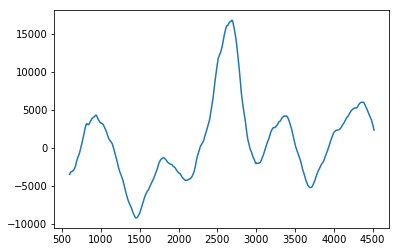

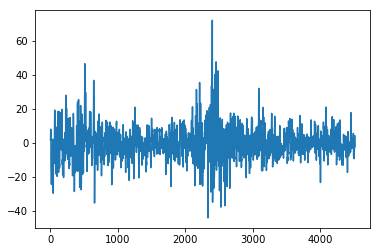

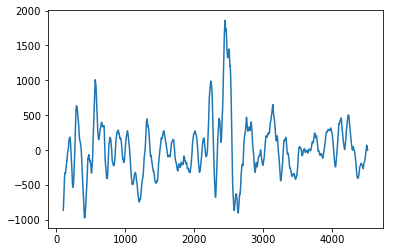

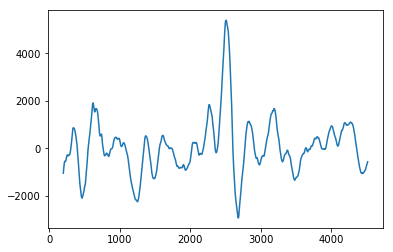

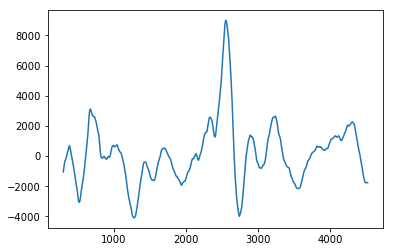

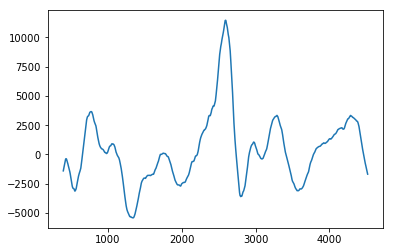

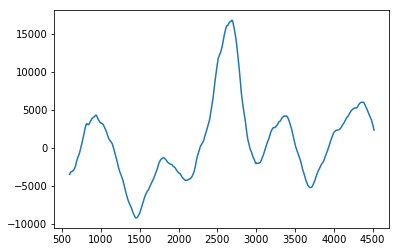

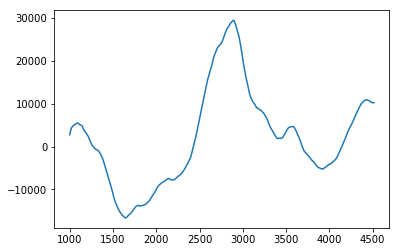

In [9]:
plt.plot(waveletfilter.applyfilter(data_file.data["Open"]))
plt.show()
waveletfilter.changeHalfPeriod(4)
plt.plot(waveletfilter.applyfilter(data_file.data["Open"]))
plt.show()
waveletfilter.changeHalfPeriod(50)
plt.plot(waveletfilter.applyfilter(data_file.data["Open"]))
plt.show()
waveletfilter.changeHalfPeriod(100)
plt.plot(waveletfilter.applyfilter(data_file.data["Open"]))
plt.show()
waveletfilter.changeHalfPeriod(150)
plt.plot(waveletfilter.applyfilter(data_file.data["Open"]))
plt.show()
waveletfilter.changeHalfPeriod(200)
plt.plot(waveletfilter.applyfilter(data_file.data["Open"]))
plt.show()
waveletfilter.changeHalfPeriod(300)
plt.plot(waveletfilter.applyfilter(data_file.data["Open"]))
plt.show()
waveletfilter.changeHalfPeriod(500)
plt.plot(waveletfilter.applyfilter(data_file.data["Open"]))
plt.show()

In [17]:
from StockClass import FFTFilter
fftfilter = FFTFilter(half_period=10)
fftfilter.applyfilter(data_file.data["Open"])

TypeError: only length-1 arrays can be converted to Python scalars

In [18]:
import numpy.fft as fft

In [26]:
fftresult = fft.fft(data_file.data["Open"][:10])

In [27]:
fftresult

array([ 636.00000000 +0.00000000e+00j,   -2.35516628 -4.68590394e+00j,
          1.34549150 -1.77925593e+00j,    2.00516628 +9.24556235e-01j,
          1.90450850 -3.11043969e-01j,    1.20000000 +5.55111512e-16j,
          1.90450850 +3.11043969e-01j,    2.00516628 -9.24556235e-01j,
          1.34549150 +1.77925593e+00j,   -2.35516628 +4.68590394e+00j])

In [2]:
basepath = os.path.abspath('__file__')[:-len('__file__')]
data_relativepath = 'Other/FinanceProject1/myDoc_initaldata'
data_file_name = 'stockCollectionUpdate - checkoutpage_1.csv'

In [3]:
def concatFullPath(basepaths, data_file_path): 
    return "%s%s"%(basepaths, data_file_path)


def getAllStock(stock_df, stock_code):
    import re
    stock_code_pattern = re.compile( '[0-9]{4}\.HK' )
    if isinstance(stock_code, str): 
        r = stock_code_pattern.findall(stock_code)
        print r
        
    else:
        print("Input Code pattern invalid:getAllStock")
        return None
    
    try: 
        data_stock = stock_df[stock_df["Stock_Code"] == stock_code]
        return data_stock
    except:
        print("Import Data Error:getAllStock")
        return None

In [4]:
data_files_full_path = concatFullPath(basepath, data_relativepath) + '/' + data_file_name

In [5]:
data_files_full_path

'/home/allen/myDoc/Google_Drive/Other/FinanceProject1/myDoc_initaldata/stockCollectionUpdate - checkoutpage_1.csv'

In [6]:
data_files = pd.read_csv(data_files_full_path)

In [7]:
data_files

,Date,Open,High,Low,Close,Volume,Stock_Code
0,1/28/1999 16:00:00,64.30,64.50,62.50,62.80,15030216,0005.HK
1,1/29/1999 16:00:00,63.50,64.50,63.20,64.50,9849291,0005.HK
2,2/1/1999 16:00:00,64.30,65.80,64.00,65.70,12635226,0005.HK
3,2/2/1999 16:00:00,64.70,65.30,64.20,64.30,5072298,0005.HK
4,2/3/1999 16:00:00,64.00,65.00,64.00,64.30,4716345,0005.HK
5,2/4/1999 16:00:00,64.20,65.00,64.00,64.70,4808817,0005.HK
6,2/5/1999 16:00:00,64.00,64.30,62.70,63.00,9934479,0005.HK
7,2/8/1999 16:00:00,63.00,63.30,62.50,62.70,5254533,0005.HK
8,2/9/1999 16:00:00,62.00,62.80,61.50,62.80,8253951,0005.HK
9,2/10/1999 16:00:00,62.00,62.30,61.20,61.70,8262927,0005.HK


In [8]:
data_files_stock = getAllStock(data_files, '0001.HK')

['0001.HK']


In [9]:
import matplotlib
import matplotlib.pyplot as plt

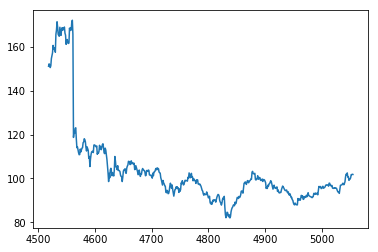

In [10]:
plt.plot(data_files_stock["Close"])
plt.show()

In [11]:
def filterDim(period =2):
    list_tmp = [1]*period + [-1]*period
    return np.array(list_tmp )

In [12]:
new_data_files = data_files_stock.Open.copy()

In [13]:
def shiftData(df):
    return df[1:]

def genFilterFullList(df, period):
    length = df.shape[0]
    c = df.copy()
    data = []
    for i in range(length-period):
        data.append(c[:period])
        c = shiftData(c)
    return data

In [14]:
half_period = 64
data = genFilterFullList(new_data_files,half_period*2)

In [15]:
def batchwavelet(df_list, filterd):
    data_wavelet = []
    for sub_list in df_list: 
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        data_wavelet.append(np.matmul(scaler.fit_transform(sub_list), filterd))
    return data_wavelet
    

In [16]:
data_filterd = batchwavelet(data, filterDim(period=half_period))

/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

In [17]:
hh = data_filterd

In [18]:
hh = [0] * half_period *2 + hh

In [19]:
data_filterd = np.array(hh)

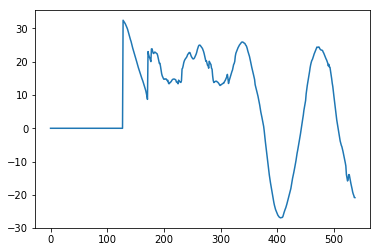

In [20]:
plt.plot(data_filterd)
plt.show()

In [21]:

new_data_Volume_files = data_files_stock.Volume.copy()


In [22]:
new_data_Volume_files.shape

(538,)

/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D

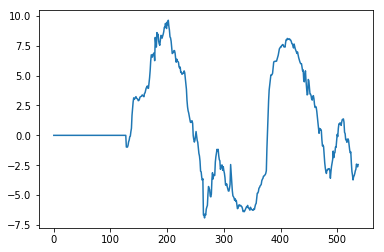

In [23]:
data_volume = genFilterFullList(new_data_Volume_files,half_period*2)
data_volume_filterd = batchwavelet(data_volume, filterDim(period=half_period))
data_volume_filterd =  np.array([0]*half_period *2  +  data_volume_filterd)
plt.plot(data_volume_filterd)
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler2= MinMaxScaler()
scaler3= MinMaxScaler()
#data_volume_filterd


In [25]:
data_volume_filterd= scaler1.fit_transform(data_volume_filterd)
data_filterd= scaler2.fit_transform(data_filterd)
data_open = scaler3.fit_transform(data_files_stock["Open"])

/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

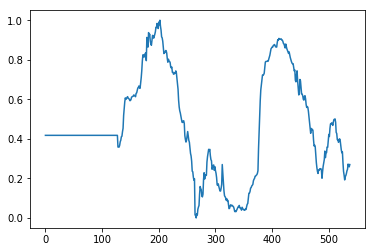

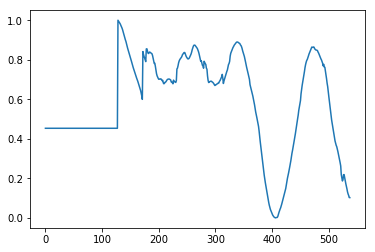

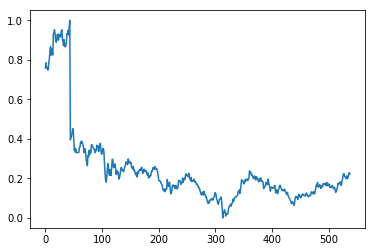

In [26]:
plt.plot(data_volume_filterd)
plt.show()
plt.plot(data_filterd)
plt.show()
plt.plot(data_open)
plt.show()

In [27]:
corr_series = []
for i in range(data_filterd.shape[0]):
    corr_series.append(data_volume_filterd[i] * data_filterd[i])

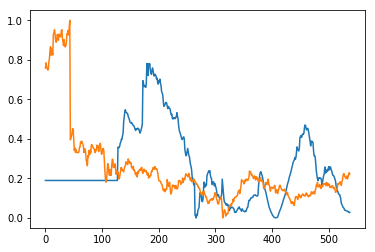

In [28]:
plt.plot(corr_series)
plt.plot(data_open)
plt.show()

In [29]:
import math
data_files_stock["mix_volume_close"] = data_files_stock.apply(lambda x: x["Close"] * math.log(x["Volume"],10), axis =1 )


/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [30]:
data_files_stock['high_low_diff'] = data_files_stock.apply(lambda x: x['High']-x['Low'], axis=1 )

/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
data_files_stock['open_close_diff'] = data_files_stock.apply(lambda x: x['Close']-x['Open'], axis=1 )

/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
data_files_stock

,Date,Open,High,Low,Close,Volume,Stock_Code,mix_volume_close,high_low_diff,open_close_diff
4518,3/18/2015 16:00:00,151.90,152.70,150.50,151.20,6828236,0001.HK,1033.347449,2.20,-0.70
4519,3/19/2015 16:00:00,154.40,154.40,152.20,152.30,4190229,0001.HK,1008.566811,2.20,-2.10
4520,3/20/2015 16:00:00,152.50,153.00,151.20,151.60,3081098,0001.HK,983.687756,1.80,-0.90
4521,3/23/2015 16:00:00,152.00,152.00,150.20,150.60,3911704,0001.HK,992.810317,1.80,-1.40
4522,3/24/2015 16:00:00,151.00,152.10,150.60,151.40,2273318,0001.HK,962.398353,1.50,0.40
4523,3/25/2015 16:00:00,151.10,155.00,151.10,154.70,5363763,0001.HK,1041.048944,3.90,3.60
4524,3/26/2015 16:00:00,154.50,157.30,154.00,156.10,4446880,0001.HK,1037.761450,3.30,1.60
4525,3/27/2015 16:00:00,156.40,157.40,156.00,157.30,2845767,0001.HK,1015.245556,1.40,0.90
4526,3/30/2015 16:00:00,159.90,160.70,158.20,160.70,5748951,0001.HK,1086.265889,2.50,0.80
4527,3/31/2015 16:00:00,162.00,162.00,157.40,158.90,6979260,0001.HK,1087.481310,4.60,-3.10


In [33]:
data_mix_volume_close = data_files_stock["mix_volume_close"].copy()

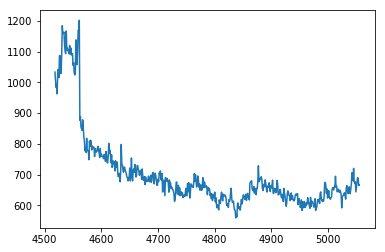

In [34]:


plt.plot(data_mix_volume_close)
plt.show()

In [35]:
fig = plt.figure()
ax,ax2 = fig.add_subplot(1,1,1)
line, = ax.plot(data_files_stock["Volume"], color='blue', lw=2)
line2, = axs.plot(data_files_stock['close_open_diff'], color='red', lw=2)
ax.set_yscale('log')
plt.show()

TypeError: 'AxesSubplot' object is not iterable

In [36]:
data_files_stock["check2"] = data_files_stock.apply(lambda x: x['mix_diff_volume'] * x['Close'], axis=1)

KeyError: ('mix_diff_volume', u'occurred at index 4518')

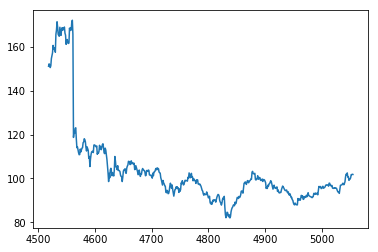

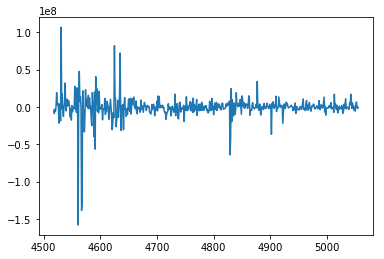

KeyError: 'check2'

In [43]:
plt.plot(data_files_stock['Close'])
#plt.show()
#plt.plot(data_files_stock['Open'])
#plt.show()
#plt.plot(data_files_stock['open_close_diff'])
#plt.show()
#plt.plot(data_files_stock['high_low_diff'])
plt.show()
#scalerH = MinMaxScaler()

#plt.plot(scalerH.fit_transform(data_files_stock['check2']))
#plt.plot(data_files_stock['check2'])
#plt.show()
plt.plot(data_files_stock['mix_diff_volume'])
plt.show()
plt.hist(data_files_stock['check2'],bins=150)
plt.show()

In [38]:
data_files_stock['mix_diff'] = data_files_stock.apply(lambda x: x['open_close_diff'] * x['high_low_diff'], axis=1)

/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
data_files_stock['mix_diff_volume'] = data_files_stock.apply(lambda x: x['open_close_diff'] * x['Volume'], axis=1)

/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/allen/anaconda2/envs/MyBaseEnv/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

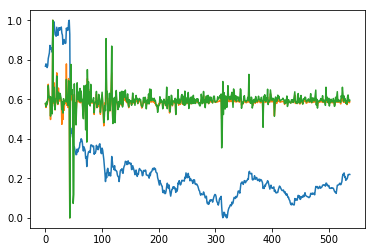

In [42]:
scalerA = MinMaxScaler()
plt.plot(scalerA.fit_transform(data_files_stock['Close']))
scalerB = MinMaxScaler()
plt.plot(scalerB.fit_transform(data_files_stock['mix_diff']))
scalerC = MinMaxScaler()
plt.plot(scalerB.fit_transform(data_files_stock['mix_diff_volume']))
plt.show()